![](/home/ubuntu/CmsOpenData/AnalysisDesigner/datafiles/cms.png)
 

<p style="margin-right:8%; margin-left:8%; font-size:25px; font-weight: 200; line-height: 1.5em">
# Start an Analysis in Experimental Particle Physics (2) 

## Part 2.1: How to identify and isolated muons for your analysis and observation of Z-boson candidates. 

In this second step, you must run [**Analyzer_Selection.py**](https://cmsopendata.ifca.es/hub/user/~/edit/AnalysisDesigner/Analyzer_Selection.py) script. This code perform the same analysis as in the part 1 of the analyis, but it fills each histogram only for those muons previously identified and isolated. 

For doing that you should include the selection criteria for each of the variables used in the step 1 of the analysis, and include such selection in the script [**Cuts.py**](https://cmsopendata.ifca.es/hub/user/~/edit/AnalysisDesigner/Cuts.py). 

 Take a look into Analyzer_Selection.py and Cuts.py and notice that a few amount of muons pass the cuts depending on the value of their variables. 

The result of this analysis is a set of histograms that contain valuable statistic information about each kinematic variable for all selected particles produced a long of all events. The aim of this exercise is getting the right muon collection produced in Z->mumu decays. 


**NOTE:** 

For each exercise, to run the code is necessary to import **ROOT**.

In [1]:
# Import ROOT
import ROOT

Welcome to ROOTaaS 6.06/00


In [2]:
cd ~/CmsOpenData/AnalysisDesigner

/home/aidaph/CmsOpenData/AnalysisDesigner


### Define the quality criteria for identify and isolate a muon.  

Before performing the analysis, you must define the cut parameter for all the muon variables, in [**Cuts.py**](https://cmsopendata.ifca.es/hub/user/~/edit/AnalysisDesigner/Cuts.py) script. 

* Require to each muon to be Global (*Muon_isGlobalMuon*)


* Minimum transverse momentum (*Muon_pt*)


* Maximum possible eta for a detected muon (*Muon_eta*)


* Chi2/ndof less than...  (*Muon_normChi2*)


* Number of valid hits in the muon chambers used in the fit. (*Muon_NValidHitsSATk*)


* Number of valid hits in the tracker used in the fit. (*numberOfValidHits*)


* Number of muon chambers used in the fit. (*Muon_numOfMatches*) 


* Distance of the muon vertex to the primary vertex in z-axis. (*Muon_dz*)


* Distance of the muon vertex to the primary vertex in xy-plane. (*Muon_dB*)


* Require the muon to be isolated (use relative isolation). (*Muon_isolation*)

In [3]:
# Define the Cuts for your Selection for each muon variable or change, directly, in the Selector

# Muon identification 
isGlobal = 1 
pt_min = 5
eta_max = 2.4
normChi2 = 10
numValidHitsSTATk = 10
numValidHits = 10 
numOfMatches = 1
dz_max = 0.2
dB_max = 0.02 # cm. dB=impact parameter

#Muon isolation
relIsolation = 0.15

# Select your Z???
mass_min = 0


Previous cuts are applied in the code as follows: 

In [4]:
# Define the class for Selector
class Selec(object):
        ''' Class that make the selection from a defined Cuts'''
        #def __init__(self):
        #    print '''***Selector created'''
        
        def selector(self, analysis, particle):

                '''Main class for making the selection'''
                if not analysis.Muon_isGlobalMuon[particle] or not analysis.Muon_isTrackerMuon[particle]:
                        return False
                analysis.h_efficiency.Fill(2)

                if analysis.Muon_pt [particle] < pt_min:
                        return False
                analysis.h_efficiency.Fill(3)

                if analysis.Muon_eta[particle] > eta_max:
                        return False
                analysis.h_efficiency.Fill(4)

                if analysis.Muon_normChi2[particle] > normChi2:
                        return False
                analysis.h_efficiency.Fill(5)
                
                if analysis.Muon_NValidHitsSATk[particle] < numValidHitsSTATk:
                        return False
                analysis.h_efficiency.Fill(6)
                
                if analysis.Muon_numberOfValidHits[particle] < numValidHits:
                        return False
                analysis.h_efficiency.Fill(7)
                                          
                if analysis.Muon_numOfMatches[particle] < numOfMatches:
                        return False
                analysis.h_efficiency.Fill(8)

                if analysis.Muon_distance[particle] > dz_max:
                        return False
                analysis.h_efficiency.Fill(9)
                
                if analysis.Muon_dB[particle] > dB_max:
                        return False
                analysis.h_efficiency.Fill(10)

                if ((analysis.Muon_isolation_sumPt[particle]+analysis.Muon_isolation_emEt[particle]
                     +analysis.Muon_isolation_hadEt[particle])/analysis.Muon_pt[particle]) > relIsolation:
                        return False
                analysis.h_efficiency.Fill(11)
                
                return True

* ### Run the analysis with the selection criteria stablished in the Cuts module. 
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">

You need to run the module [**Analyzer_Selection.py**](https://cmsopendata.ifca.es/hub/user/~/edit/AnalysisDesigner/Analyzer_Selection.py) and obtain a new root file called **goodHistos.root**. It is stored in the [**datafiles**](https://cmsopendata.ifca.es/hub/user/~/tree/AnalysisDesigner/datafiles) folder, and it contains the histograms for all the idefied and isolated muons, following your criteria. 

Each histogram is saved with a name started by **h_** followed by the **name of the kinematic variable**.

In [5]:
import os
import logging

# Import the main module which run the analysis for ALL MUONS
from Analyzer_Selection import AnalyzerSel

# Instance of AnalyzerAll
analysis = AnalyzerSel()

In [6]:
#Loop over events
#--------------------------------------------------------------------
analysis.beginJob("goodhistos.root")
print "Start the Analysis"

print "Running ................"

# For each event or entry,the following loop populates the tree branches, 
# creates every muon and add it to all_muons list

selector = Selec()

for event in range(0, analysis.numEntries):
    analysis.process(event,selector)
        
analysis.endJob()

print "Well done! analysis ended. Now you can plot the histograms."


*** Begin job
efficiency defined
Start the Analysis
Running ................
*** writing file <ROOT.TFile object ("datafiles/goodhistos.root") at 0x3f5b010>
*** done
Well done! analysis ended. Now you can plot the histograms.


* ### Check your h_histograms
<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">

Open the goodHistos.root file for reading and printing the list of histograms saved in it. 


In [7]:
!ls -l ~/CmsOpenData/AnalysisDesigner/datafiles

total 73044
-rwxrwxr-x 1 aidaph aidaph   135450 Mar 30 12:12 cms.png
-rw-r--r-- 1 aidaph aidaph    11752 Jul  1 11:38 goodhistos.root
-rw-r--r-- 1 aidaph aidaph    12750 Jun 17 12:01 histos.root
-rw-rw-r-- 1 aidaph aidaph 74627190 Mar 30 12:12 mytree.root


In [8]:
# Get the root file that contains the histograms for selected muons: goodHistos.root.
Gfile = ROOT.TFile("~/CmsOpenData/AnalysisDesigner/datafiles/goodhistos.root", "read")

# List the histograms in the file
Gfile.ls()

TFile**		/home/aidaph/CmsOpenData/AnalysisDesigner/datafiles/goodhistos.root	
 TFile*		/home/aidaph/CmsOpenData/AnalysisDesigner/datafiles/goodhistos.root	
  KEY: TH1F	h_efficiency;1	efficiency
  KEY: TH1F	h_type;1	Number of Muons
  KEY: TH1F	h_pt;1	Muons Transverse Momentun
  KEY: TH1F	h_px;1	Muons x- Momentun
  KEY: TH1F	h_py;1	Muons y- Momentun
  KEY: TH1F	h_pz;1	Muons z- Momentun
  KEY: TH1F	h_eta;1	Angle Transvese
  KEY: TH1F	h_energy;1	Muons Energy
  KEY: TH1F	h_dz;1	Distance from Primary vertex Z 
  KEY: TH1F	h_charge;1	Muons Charge
  KEY: TH1F	h_normChi2;1	Muons Chi2/ndof
  KEY: TH1F	h_numberOfValidHits;1	Number of Valid Hits
  KEY: TH1F	h_numOfMatches;1	Number of muon chambers matched
  KEY: TH1F	h_NValidHitsSATk;1	Number of hits in the muon chambers
  KEY: TH1F	h_dB;1	Impact Parameter
  KEY: TH1F	h_isolation_sumPt;1	Tracker Isolation
  KEY: TH1F	h_isolation_emEt;1	ECAL Isolation
  KEY: TH1F	h_isolation_hadEt;1	HCAL Isolation
  KEY: TH1F	h_isolation;1	Relative Isolation
  KEY:

* ### Check your selection efficiency 

We have added a new important histogram called **efficiency**. For each selection cut in [**Cuts.py**](https://cmsopendata.ifca.es/hub/user/~/edit/AnalysisDesigner/Cuts.py) we defined the following value: 

<p style="margin-right:0%; margin-left:0%; font-size:14px; font-weight: 200; line-height: 1.2em">
**efficiency = Number of events after cut N / Number of events after cut N-1**

Let's plot the efficiency of each identification and isolation cut. Could you compute the final efficiency of your selection? 

 
---------------------------------- 
FINAL EVENTS IN EACH SELECTION CUT 
---------------------------------- 
 
All:                                781606.0
Is Global and Traker Mu:            649367.0
Pt Min:                             441794.0
Eta Max:                            441294.0
Chi2/ndof:                          437304.0
# of Valid Hits in the STA track:   430212.0
# of Valid Hits in the TRK track:   422055.0
# of Matched Muon chmbers:          421044.0
dz Max:                             398108.0
dB Max:                             349423.0
Relative Isolation:                 77745.0


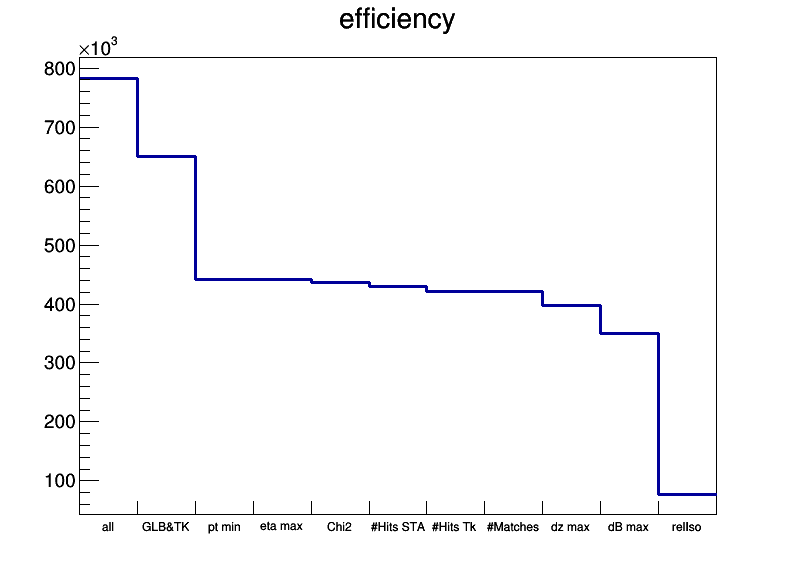

In [9]:
### You must create a variable to store the histograms selected.
histo2 = Gfile.Get('h_efficiency')

histo2.GetXaxis().SetBinLabel(1,"all")
histo2.GetXaxis().SetBinLabel(2, "GLB&TK")
histo2.GetXaxis().SetBinLabel(3, "pt min")
histo2.GetXaxis().SetBinLabel(4, "eta max")
histo2.GetXaxis().SetBinLabel(5, "Chi2")
histo2.GetXaxis().SetBinLabel(6, "#Hits STA") 
histo2.GetXaxis().SetBinLabel(7, "#Hits Tk")
histo2.GetXaxis().SetBinLabel(8, "#Matches") 
histo2.GetXaxis().SetBinLabel(9, "dz max")
histo2.GetXaxis().SetBinLabel(10, "dB max")
histo2.GetXaxis().SetBinLabel(11, "relIso")

print " "
print "---------------------------------- "
print "FINAL EVENTS IN EACH SELECTION CUT "
print "---------------------------------- "
print " "
print "All:                               ", histo2.GetBinContent(1)
print "Is Global and Traker Mu:           ", histo2.GetBinContent(2)
print "Pt Min:                            ", histo2.GetBinContent(3)
print "Eta Max:                           ", histo2.GetBinContent(4)
print "Chi2/ndof:                         ", histo2.GetBinContent(5)
print "# of Valid Hits in the STA track:  ", histo2.GetBinContent(6)
print "# of Valid Hits in the TRK track:  ", histo2.GetBinContent(7)
print "# of Matched Muon chmbers:         ", histo2.GetBinContent(8)
print "dz Max:                            ", histo2.GetBinContent(9)
print "dB Max:                            ", histo2.GetBinContent(10)
print "Relative Isolation:                ", histo2.GetBinContent(11)



### Then create again a new the canvas where the histograms are going to be drawn
canvas = ROOT.TCanvas("myCanvas","Efficiency",800,600)

from ROOT import gStyle

# To not print the top-right box of the first histogram
gStyle.SetOptStat(0)

# Draw the histograms in the same canvas
#histo1.Draw()
histo2.Draw("")

### At last, draw the canvas
canvas.Draw()

* ### Draw Histograms and compare them with the ones from the Tutorial 1 


The next step is to plot the rest of the histograms created with the selection you applied. 

Follow the same root methods used in [Tutorial 1](https://cmsopendata.ifca.es/hub/user/~/notebooks/tutorials/Part1.ipynb) to plot individual histograms. 

You can compare the histograms for all the muons stored in [**datafiles/histos.root**](https://cmsopendata.ifca.es/hub/user/~/tree/AnalysisDesigner/datafiles) and the histograms for only the muons you have identify and isolated in the present exercise and stored in [**datafiles/goodhistos.root**](https://cmsopendata.ifca.es/hub/user/~/tree/AnalysisDesigner/datafiles) on the same canvas: 

* To do that you must initialize the two histograms you want to draw, and only create one canvas. For example, we are going to draw the pt histograms of the muons you selected and we compare them with all the muons (i.e. no initial seletcion)


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: myCanvas


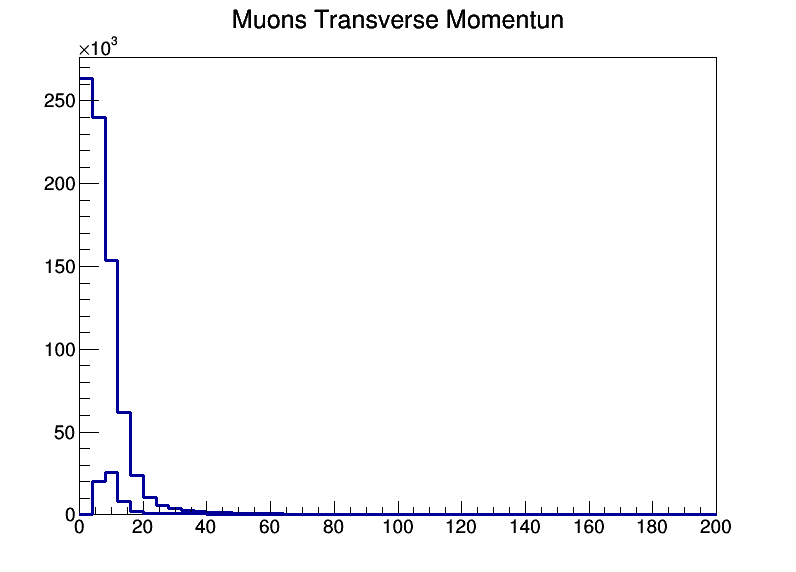

In [37]:
### Get the root file that contains the histograms for all muons: histos.root, created in Tutorial 1 
Hfile = ROOT.TFile("datafiles/histos.root", "read")


### You must create a variable to store the histograms selected.
histo1 = Hfile.Get('h_pt')
histo2 = Gfile.Get('h_pt')


### Then create again a new the canvas where the histograms are going to be drawn
canvas = ROOT.TCanvas("myCanvas","All muons: Pt",800,600)

from ROOT import gStyle
### One more time, draw the histogram
#histo_all.SetTitle("pt good/all Comparation")

# To not print the top-right box of the first histogram
gStyle.SetOptStat(0)

# Draw the histograms in the same canvas
histo1.Draw()
histo2.Draw("same")

### At last, draw the canvas
canvas.Draw()


2. And set again your preferences. ** PAY ATTENTION :** some settings are applied on the histo variable some others on the canvas.  

References:

[Tcolor Class](https://root.cern.ch/doc/master/classTColor.html)

[Histogram Customization](https://root.cern.ch/doc/v606/classTHistPainter.html)

[Marker Atributtes such as color, size or style for histograms](https://root.cern.ch/doc/master/classTAttMarker.html)

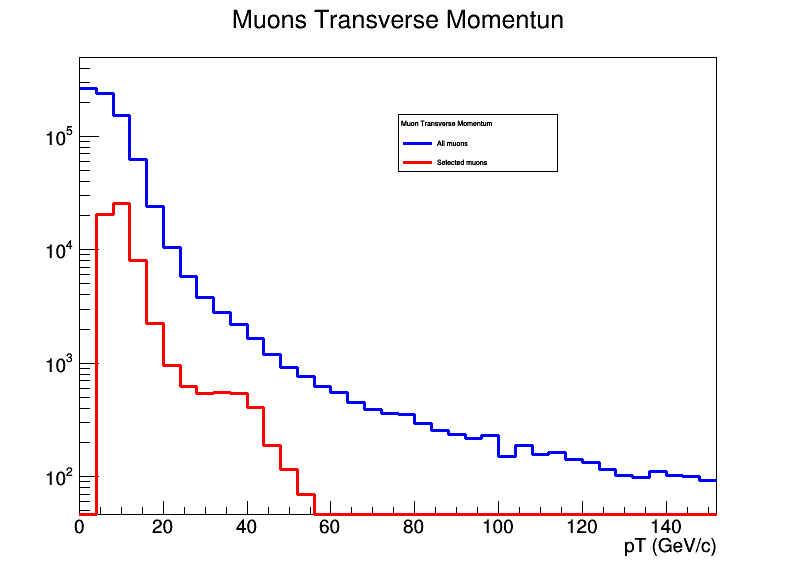

In [38]:
### Change the line color 
histo1.SetLineColor(4)
histo2.SetLineColor(2)

### Change the bounds of the histograms for X Axis 
histo1.GetXaxis().SetRangeUser(0, 150);
histo2.GetXaxis().SetRangeUser(0, 150);

### Wrote the X-axis label
histo1.GetXaxis().SetTitle("pT (GeV/c)");

### Change the bins for the histograms by diving by a divisor of the initial number of bins. 
## Note: To restore the binning you must to draw the histo again.
#histo_all.Rebin(2)

### Create the legend. TLegend(x1, y1, x2, y2)
legend =ROOT.TLegend(0.7,0.8,0.50,0.7);
legend.SetHeader("Muon Transverse Momentum");
legend.AddEntry(histo1, "All muons","l");
legend.AddEntry(histo2, "Selected muons","l");

#legend->AddEntry("gr","Graph with error bars","lep");
legend.Draw();

### Twist linear scale for Y axe to the logaritmic one with the function SetLogy.
canvas.SetLogy()

### Draw the histogram again and check your changes 
canvas.Draw()

## Part 2.2: Select pair of muons with opposite charge and compute their invariant mass

In the [**Analyzer_Selection.py**](https://cmsopendata.ifca.es/hub/user/~/edit/AnalysisDesigner/Analyzer_Selection.py) script we have already selected pairs of muons in each event and we have compute their invariant mass, from the [four-momentum](https://en.wikipedia.org/wiki/Four-momentum) of each muon. 


On the following you have to compare the invariant mass histogram for all the muons, as in the Tutorial 1, and for the muons you have selected in the present analysis. How you select you Z boson ? 


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: myCanvas


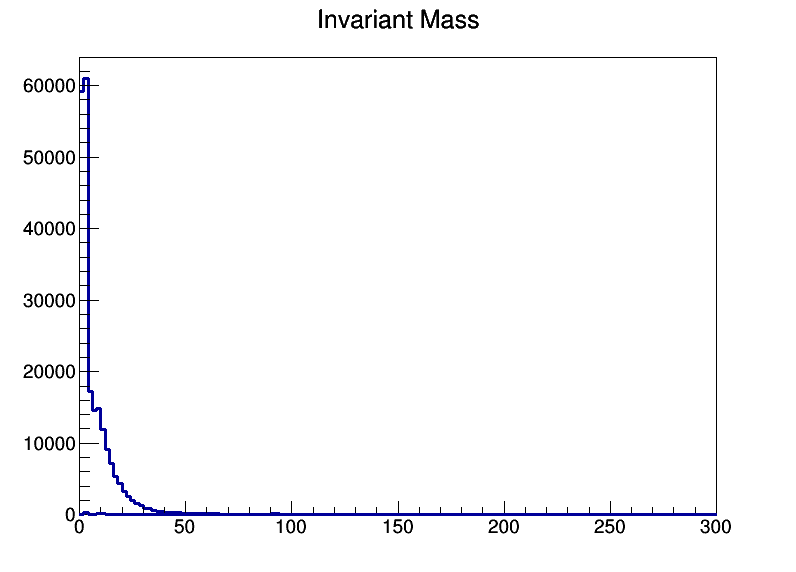

In [39]:
### You must create a variable to store the histograms selected.
histo3=Hfile.Get('h_mass')
histo4=Gfile.Get('h_mass')


### Then create again a new the canvas where the histograms are going to be drawn
canvas = ROOT.TCanvas("myCanvas","Invariant mass",800,600)

from ROOT import gStyle
### One more time, draw the histogram
histo3.SetTitle("Invariant Mass")

# To not print the top-right box of the first histogram
gStyle.SetOptStat(0)
# Draw the histograms in the same canvas
histo3.Draw()
histo4.Draw("same")


### At last, draw the canvas
canvas.Draw()

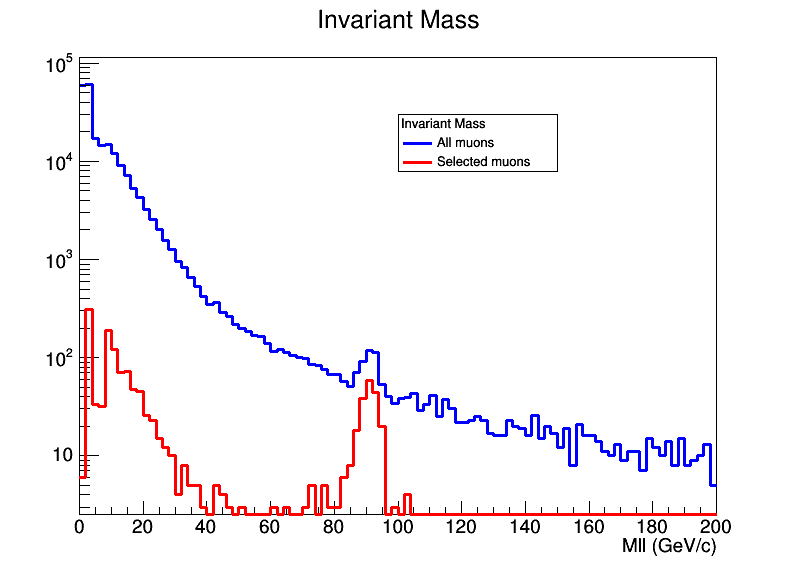

In [40]:
### Change the line color 
histo3.SetLineColor(4)
histo4.SetLineColor(2)

### Change the bounds of the histograms for X Axis 
histo3.GetXaxis().SetRangeUser(0, 200);
histo4.GetXaxis().SetRangeUser(0, 200);


### Change the bins for the histograms by diving by a divisor of the initial number of bins. 
## Note: To restore the binning you must to draw the histo again.
#histo1.Rebin(2)

### Create the legend. TLegend(x1, y1, x2, y2)
legend =ROOT.TLegend(0.7,0.8,0.50,0.7);
legend.SetHeader("Invariant Mass");
legend.AddEntry(histo3, "All muons","l");
legend.AddEntry(histo4, "Selected muons","l");

### Wrote the X-axis label
histo3.GetXaxis().SetTitle("Mll (GeV/c)");

#legend->AddEntry("gr","Graph with error bars","lep");
legend.Draw();

### Twist linear scale for Y axe to the logaritmic one with the function SetLogy.
canvas.SetLogy()

### Draw the histogram again and check your changes 
canvas.Draw()

* ## Save the images in a .png file. 

The previous procedure does not save the image automatically, it just shows you the picture. This statement can be written before or after stablish your favorite setting. Hence, you can collect both histograms for the analysis. 

All the .png files created are stored in the folder [output_histograms](https://cmsopendata.ifca.es/hub/user/~/tree/output_histograms)

In [41]:
# If you want keep it, you must type: 
# NOTE: Write the name of the file 

name = "invariant mass"
canvas.SaveAs("../output_histograms/"+ name +".png")

# This save the last image as a .png file.

Info in <TCanvas::Print>: png file ../output_histograms/invariant mass.png has been created
